In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [25]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


How many rows and columns are in `gdp_df`? What are the data types of each column?

Rows = 7662
Columns = 4
DataTypes = string, integer, float, float

Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [35]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

KeyError: "['Value Footnotes'] not found in axis"

In [37]:
#Check to see what the column names look like
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [39]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})

In [41]:
#Check to make sure it worked!
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [71]:
#Find how many years are represented in the data.
gdp_df['Year'].nunique()

33

In [77]:
#Count the values of each country. To show how many years are represented.
country_count = gdp_df['Country'].value_counts().reset_index()

In [79]:
country_count

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [87]:
#Find the countries that 33 years represented
country_count.loc[country_count['count'] == 33].count()

Country    202
count      202
dtype: int64

There are 202 countries that have data for all 33 years.
Countries that are missing a lot of data include: Kosovo, Sint Maarten, Turks & Caicos Islands, Somalia, Djbouti

In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [93]:
#Using our gdp dataframe, create a new dataframe that only shows the year 2020
year_2020 = gdp_df[gdp_df['Year']== 2020]

In [95]:
#Check it out
year_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

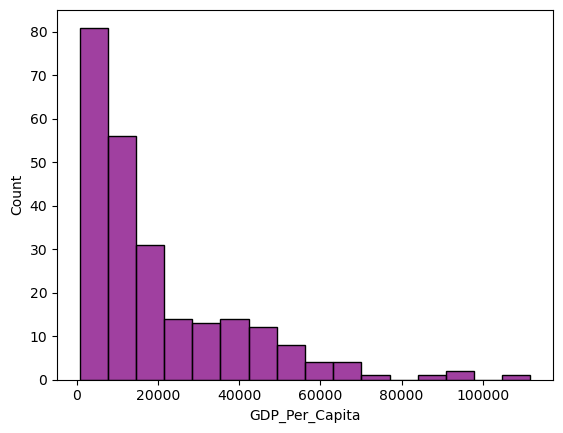

In [103]:
#Histogram
sns.histplot(data=year_2020, x='GDP_Per_Capita', color = 'purple')

In [ ]:
#Density Plot
